<h1>Exploring Baby Names in the USA (1880 - 2010)</h1>

<h3>Analyze and visualize trends in baby names in the USA from 1880 to 2010, including total births by gender and the popularity of top boys and girls names over time. This notebook based on <code>babynames_handler.py</code> script.</h3>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Get all data form `datasets/babynames` folder in one DataFrame. Create a list of DataFrame for each year.

In [2]:
pieces = [
    pd.read_csv(
        f"../datasets/babynames/yob{year}.txt",
        names=['name', 'sex', 'birth'],  # add columns to DataFrame
    ).assign(
        year=year
    )  # add the 'year' column to DataFrame
    for year in range(1880, 2011, 10)  # loop over each 10 years from 1880 t0 2011
]

Collect all data in one DataFrame

In [3]:
names_df = pd.concat(pieces, ignore_index=True)

In [4]:
names_df.head()

,name,sex,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [5]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187272 entries, 0 to 187271
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name    187272 non-null  object
 1   sex     187272 non-null  object
 2   birth   187272 non-null  int64 
 3   year    187272 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 5.7+ MB


Count total births. 
A `pandas pivot table` is used to summarize and analyze data by aggregating values based on specified rows, columns, and functions. Data is grouped, and metrics like totals, averages, or counts are calculated to provide insights in a tabular format.

In [6]:
total_births = pd.pivot_table(
    names_df,
    values='birth',
    index='year',
    columns='sex',
    aggfunc='sum',
)
total_births

sex,F,M
year,,
1880,90993,110493
1890,190377,111026
1900,299873,150554
1910,396416,194198
1920,1198214,1064468
1930,1125521,1096663
1940,1143281,1158668
1950,1713001,1789936
1960,2022062,2132588


Filter DataFrame by gender and popularity (minimum one name per day in year)

In [7]:
popular_boys_names = names_df.loc[(names_df['sex'] == 'M') & (names_df['birth'] >= 365)]

In [8]:
popular_girls_names = names_df.loc[
    (names_df['sex'] == 'F') & (names_df['birth'] >= 365)
]

Create tables of popular boys' and girls' names by each year

In [9]:
count_boys_names = pd.pivot_table(
    popular_boys_names,
    values='birth',
    index='name',
    columns='year',
    aggfunc='max',
    dropna=True,
    fill_value=0,
)
count_boys_names.head()

year,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
name,,,,,,,,,,,,,,
Aaden,0,0,0,0,0,0,0,0,0,0,0,0,0,448
Aarav,0,0,0,0,0,0,0,0,0,0,0,0,0,438
Aaron,0,0,0,0,668,500,512,798,1771,6581,13163,14545,9548,7374
Abel,0,0,0,0,0,0,0,0,0,0,475,603,763,1119
Abraham,0,0,0,0,657,0,0,0,0,0,779,1128,1678,1899


In [10]:
count_girls_names = pd.pivot_table(
    popular_girls_names,
    values='birth',
    index='name',
    columns='year',
    aggfunc='max',
    dropna=True,
    fill_value=0,
)
count_girls_names.head()

year,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
name,,,,,,,,,,,,,,
Aaliyah,0,0,0,0,0,0,0,0,0,0,0,0,1494,4628
Abbey,0,0,0,0,0,0,0,0,0,0,0,507,660,0
Abbie,0,0,0,0,0,0,0,0,0,0,0,0,432,0
Abbigail,0,0,0,0,0,0,0,0,0,0,0,0,473,585
Abby,0,0,0,0,0,0,0,0,0,0,930,1293,1564,1140


Filter tables of popular names and get most popular

In [11]:
count_boys_names = count_boys_names.loc[count_boys_names.idxmax()].drop_duplicates()
count_boys_names

year,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
name,,,,,,,,,,,,,,
John,9655,8502,9834,11451,56911,52396,54753,79384,76125,58532,35242,29064,20066,11424
Robert,2416,2542,3827,5609,48686,62108,61182,83521,72359,57195,34241,28858,13728,7471
James,5927,5097,7246,9194,47925,53921,62454,86094,76860,61773,39289,32340,17970,13714
David,869,731,889,1258,7446,12263,27676,60704,85917,61760,41878,33735,19726,14042
Michael,0,394,499,844,3996,3537,13225,65137,84192,85298,68619,65268,32016,17133
Jacob,404,0,0,0,1048,621,515,464,492,913,8513,21993,34454,21875


In [12]:
count_girls_names = count_girls_names.loc[count_girls_names.idxmax()].drop_duplicates()
count_girls_names

year,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
name,,,,,,,,,,,,,,
Mary,7065,12078,16710,22840,70974,64110,56203,65444,51477,19199,11469,8651,6174,2826
Linda,0,0,0,0,0,494,18368,80408,37317,8748,2803,1660,845,467
Jennifer,0,0,0,0,0,0,0,2804,7240,46151,58375,22218,9386,2601
Jessica,0,0,0,0,0,0,0,404,559,4020,33914,46459,15698,3161
Emily,0,509,626,786,2169,1346,1268,1315,1222,1930,9001,19349,25949,14172
Isabella,0,0,0,0,0,0,0,0,0,0,0,0,6240,22731


Plotting total births

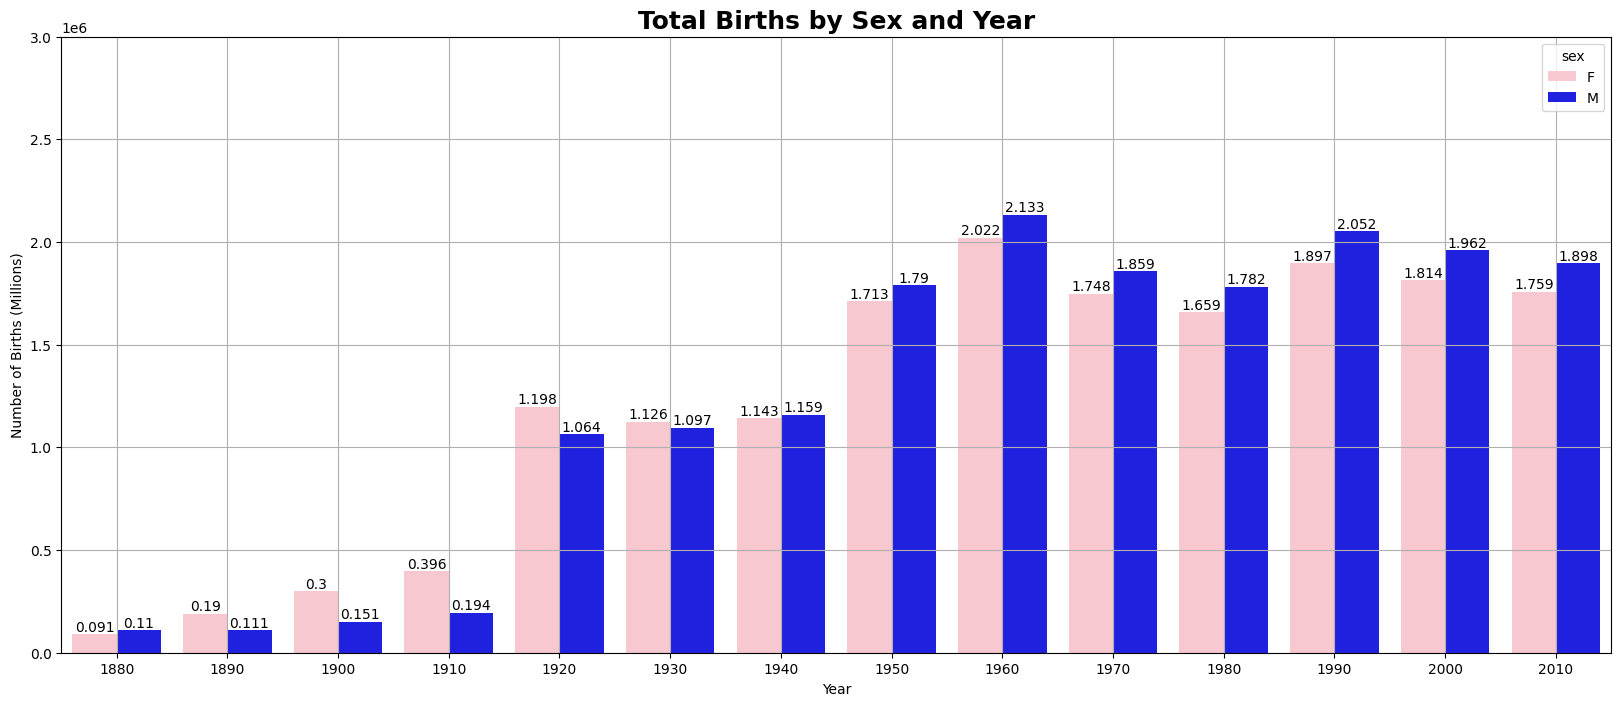

In [13]:
plt.figure(figsize=(20, 8))

# Rearrange data for plotting
total_data = total_births.stack()
total_data.name = 'births'  # set the name of the stacked data
total_data = total_data.reset_index()

sns.barplot(
    y='births',
    x='year',
    hue='sex',
    data=total_data,
    palette={'F': 'pink', 'M': 'blue'},
)

# Add exact birth number as plot labels
for container in plt.gca().containers:
    plt.bar_label(
        container,
        labels=[round(rect.get_height() / 1000000, 3) for rect in container],
    )

plt.ylim(0, 3000000)
plt.yticks(range(0, 3500000, 500000))
plt.ylabel("Number of Births (Millions)")
plt.xlabel("Year")

plt.title(
    "Total Births by Sex and Year",
    fontsize=18,
    fontweight='bold',
)
plt.grid(True)
plt.show()

Get the number of most popular boys and girls names by each day in year

In [14]:
boys_names_data = count_boys_names / 365

In [15]:
girls_names_data = count_girls_names / 365

Define a dictionary to map names to colors

In [16]:
names_colors_mapping = {
    'boys': {
        'John': 'blue',
        'Robert': 'green',
        'James': 'orange',
        'David': 'red',
        'Michael': 'brown',
        'Jacob': 'gray',
    },
    'girls': {
        'Mary': 'pink',
        'Linda': 'magenta',
        'Jennifer': 'yellow',
        'Jessica': 'purple',
        'Emily': 'lightblue',
        'Isabella': 'cyan',
    },
}

Plotting most popular boys names by each day in year

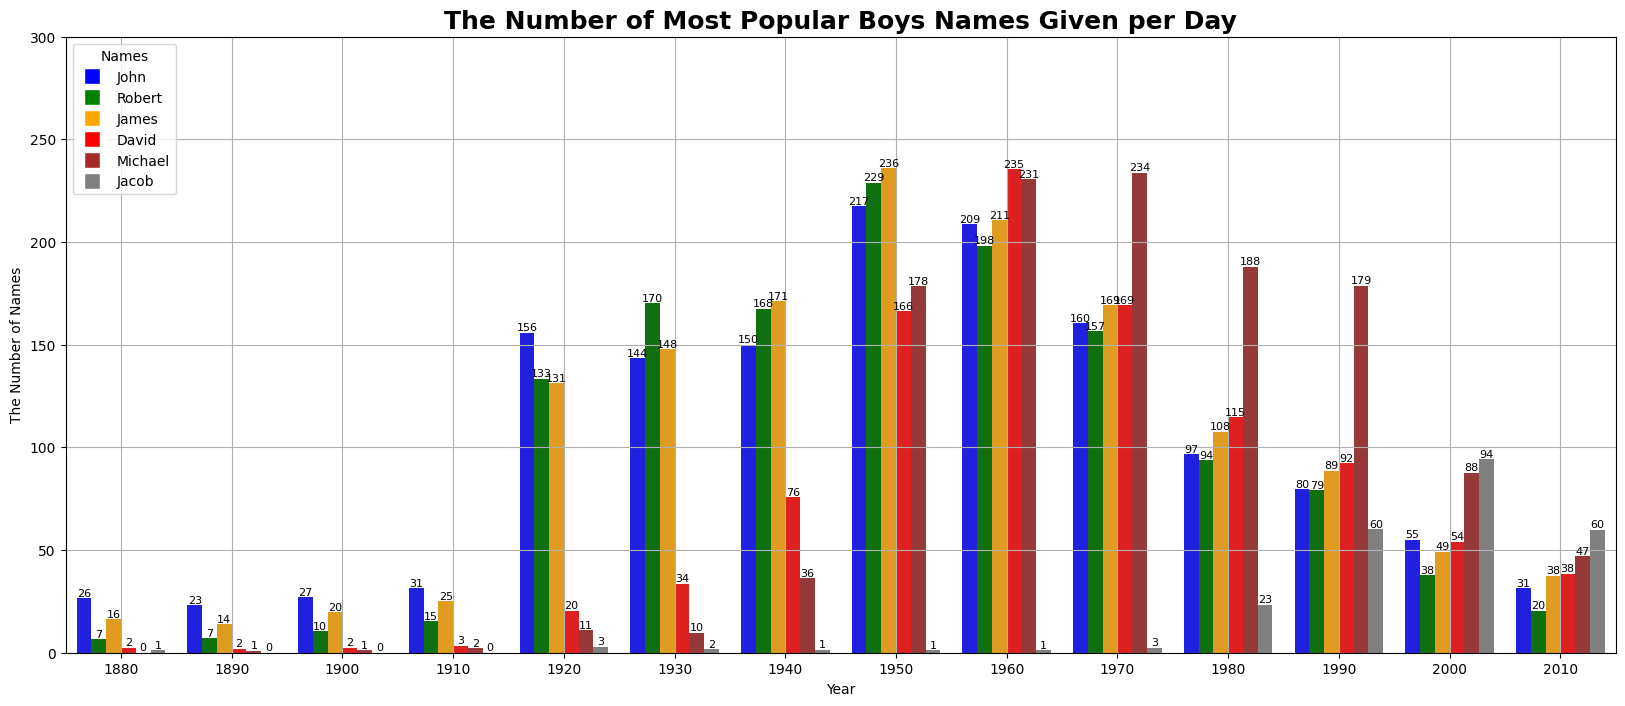

In [17]:
plt.figure(figsize=(20, 8))

# Rearrange data for plotting
boys_names_data = boys_names_data.stack()
boys_names_data.name = 'births'
boys_names_data = boys_names_data.reset_index()

sns.barplot(
    x='year',
    y='births',
    hue='name',
    data=boys_names_data,
    palette=names_colors_mapping['boys'].values(),
)

# Custom legend using dictionary
handles = [
    plt.Line2D(
        xdata=[0],
        ydata=[0],
        marker='s',
        color='w',
        markerfacecolor=color,
        markersize=12,
        label=name,
    )
    for name, color in names_colors_mapping['boys'].items()
]
plt.legend(handles=handles, title='Names', loc='upper left')

# Add exact names number as plot label
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.0f', fontsize=8)

plt.ylim(0, 300)
plt.yticks(range(0, 350, 50))
plt.ylabel("The Number of Names")
plt.xlabel("Year")

plt.title(
    "The Number of Most Popular Boys Names Given per Day",
    fontsize=18,
    fontweight='bold',
)
plt.grid(True)
plt.show()

Plotting most popular girls names by each day in year

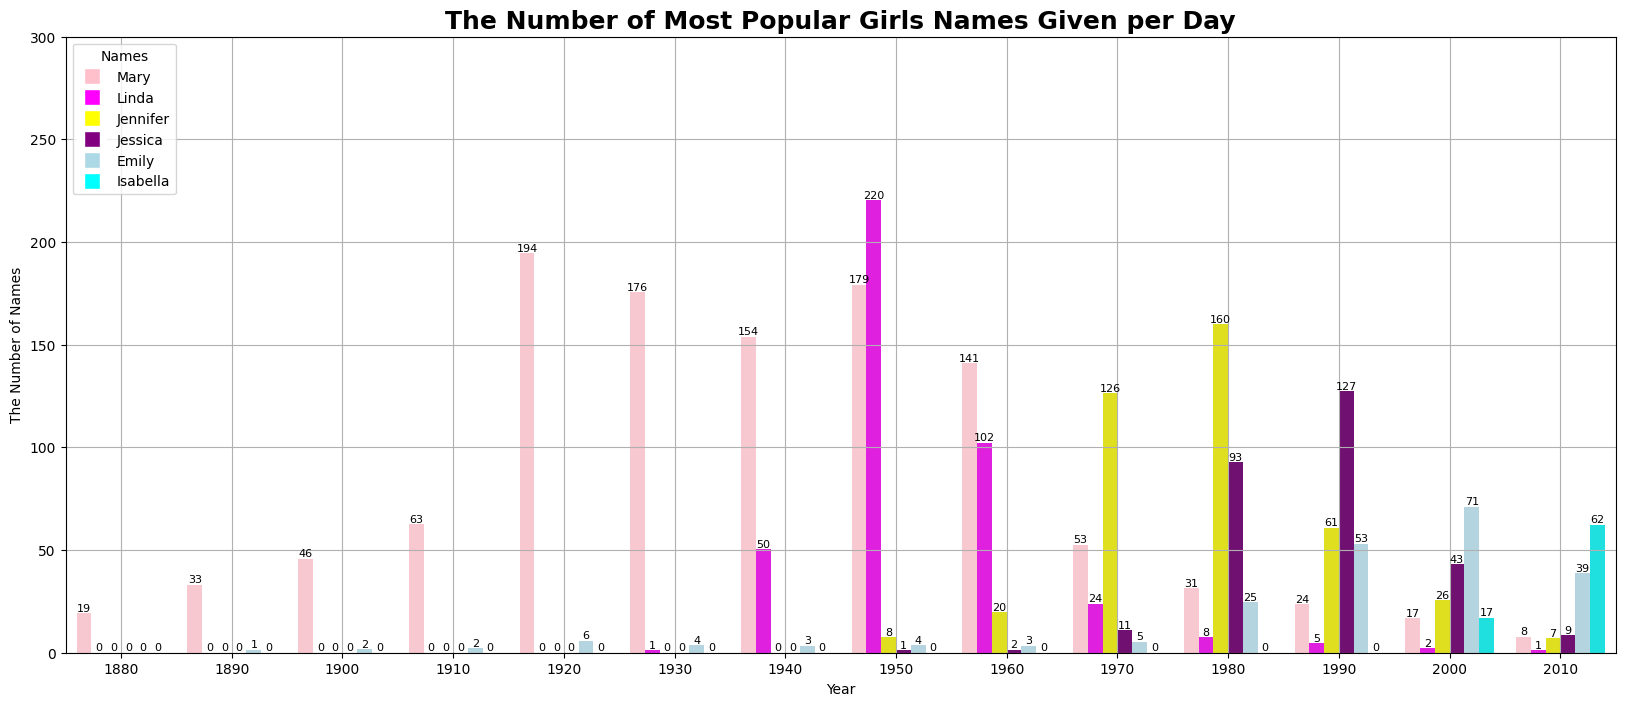

In [18]:
plt.figure(figsize=(20, 8))

# Rearrange data for plotting
girls_names_data = girls_names_data.stack()
girls_names_data.name = 'births'
girls_names_data = girls_names_data.reset_index()

sns.barplot(
    x='year',
    y='births',
    hue='name',
    data=girls_names_data,
    palette=names_colors_mapping['girls'].values(),
)

# Custom legend using dictionary
handles = [
    plt.Line2D(
        xdata=[0],
        ydata=[0],
        marker='s',
        color='w',
        markerfacecolor=color,
        markersize=12,
        label=name,
    )
    for name, color in names_colors_mapping['girls'].items()
]
plt.legend(handles=handles, title='Names', loc='upper left')

# Add exact names number as plot label
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.0f', fontsize=8)

plt.ylim(0, 300)
plt.yticks(range(0, 350, 50))
plt.ylabel("The Number of Names")
plt.xlabel("Year")

plt.title(
    "The Number of Most Popular Girls Names Given per Day",
    fontsize=18,
    fontweight='bold',
)
plt.grid(True)
plt.show()